# This is the combination of all features so far

### Description of features:<br><br>
-  the anode(ito) is not included since all devices are using ITO, so no difference between them.
-  lumo goes from anode to cathode, so lumo_1 is HIL, lumo_2 is HTl and so on (except LUMO is for EML)
-  HOMO goes from anode to cathode, so homo_1 is HIL, homo_2 is HTl and so on (except HOMO is for EML)
-  thickness goes from anode to cathode, so t1 is HIL, t2 is HTl and so on (except thick is for EML)
-  wf_1 is the workfuntion for the cathode
-  the other data is the energy difference between the layers so:
>  -  h2-h1 is homo for HTL minus homo for HIL and so on
>  -  l1-l2 is lumo for HIL minus kumo for HTL and so on
  

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from pandas.tools.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

# change directory to excel file and read excel file
os.chdir('C:/Anaconda3/projects/oled')
df = pd.read_excel('oled.xlsx', sheetname='features')
#fill the missing data
df = df.fillna(value=0)
X = df[list(df.columns)[1:-1]]
X.head()

,lumo_1,homo_1,lumo_2,homo_2,lumo_3,homo_3,LUMO,HOMO,lumo5,homo5,...,h6-h5,wf-h6,ito-L1,l1-l2,l2-l3,l3-l4,l4-l5,l5-l6,l6-wf,label
0,2.1,5.2,2.0,5.5,2.4,5.9,2.40,5.90,2.5,6.8,...,-0.6,-2.7,2.6,0.1,-0.4,0.00,-0.10,-0.3,-0.7,10-30
1,3.3,5.2,2.0,5.5,2.4,5.9,2.40,5.90,2.5,6.8,...,-0.6,-2.7,1.4,1.3,-0.4,0.00,-0.10,-0.3,-0.7,10-30
2,3.3,5.2,2.0,5.5,2.4,5.9,2.40,5.90,2.5,6.8,...,-0.6,-2.7,1.4,1.3,-0.4,0.00,-0.10,-0.3,-0.7,10-30
3,3.3,5.2,2.0,5.5,2.4,5.9,0.73,5.38,2.5,6.8,...,-0.6,-2.7,1.4,1.3,-0.4,1.67,-1.77,-0.3,-0.7,<10
4,3.3,5.2,2.0,5.5,2.4,5.9,2.40,5.70,2.5,6.8,...,-0.6,-2.7,1.4,1.3,-0.4,0.00,-0.10,-0.3,-0.7,10-30


In [2]:
# let's look at y
Y = df['cd/A']
Y.head()

0    22.5
1    13.5
2    20.8
3    10.0
4    17.7
Name: cd/A, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD6DC3D198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FD6FB95D30>]], dtype=object)

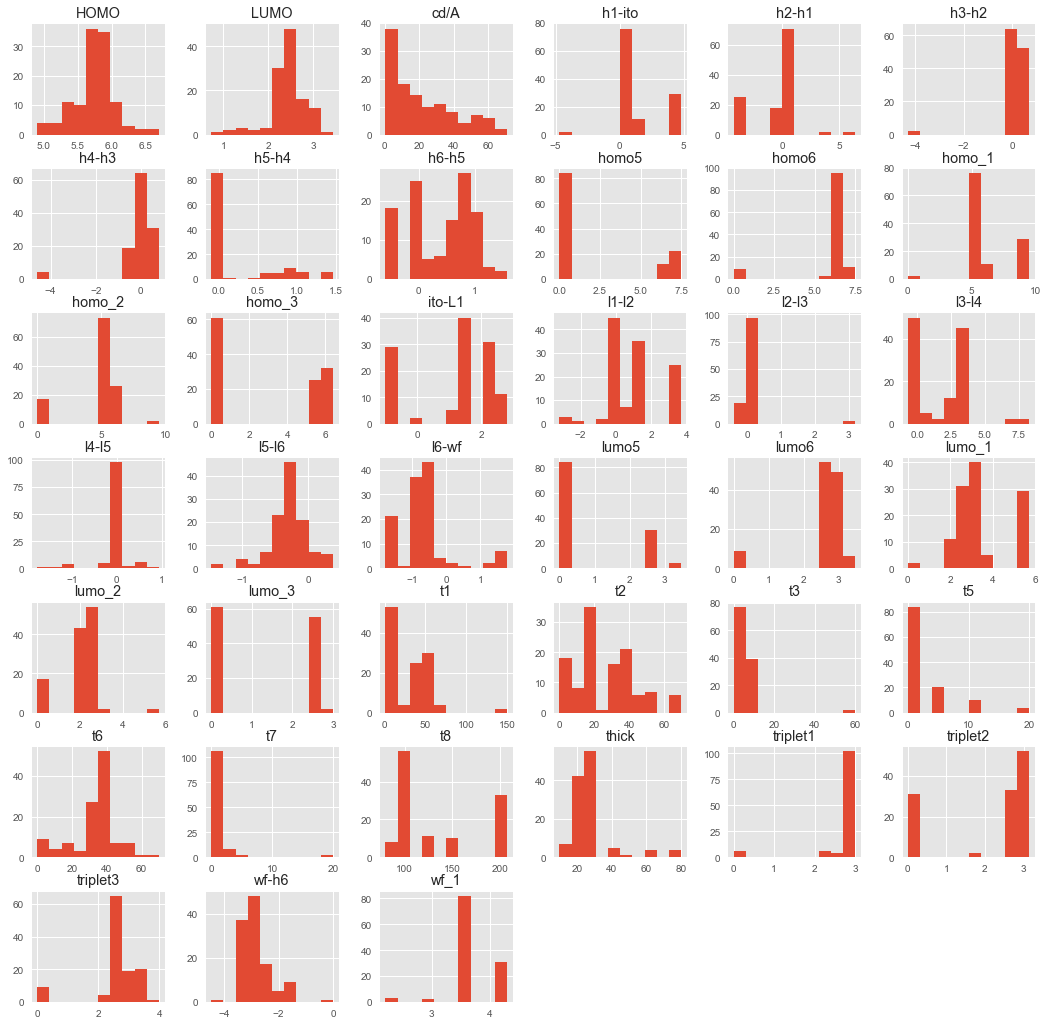

In [3]:
X = df[list(df.columns)[1:]]
plt.rcParams['figure.figsize'] = (18.0, 18.0)
X.hist()

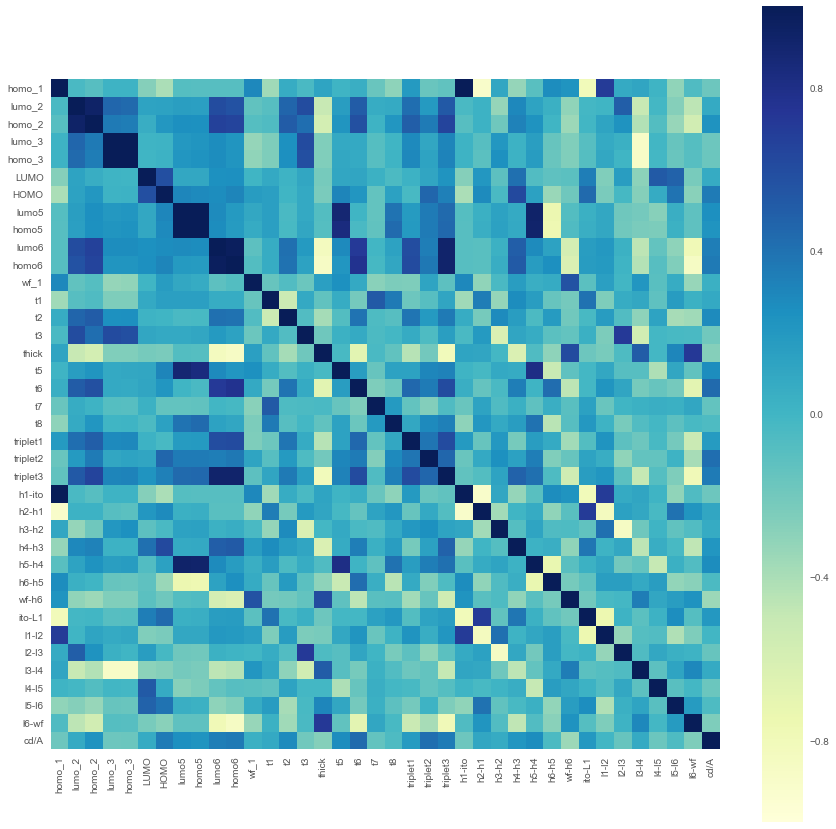

List the features in descending order of their correlation with cd/A:

t6:   0.4401725145413747
triplet2:   0.4200492644318391
homo6:   0.3633866255548749
HOMO:   0.3560975332102892
triplet3:   0.3547682890104832
wf-h6:   -0.3494536415480719
lumo6:   0.3377520039707783
t2:   0.2778516938304513
t5:   0.27258949254300585
h5-h4:   0.2723522277414779
thick:   -0.2708890127804541
lumo5:   0.25316839185876083
l6-wf:   -0.24669109208833917
homo_2:   0.23709723652724904
homo5:   0.22797826247646302
h4-h3:   0.21856249180158865
ito-L1:   0.2006226826637069
t3:   -0.19249913637144736
triplet1:   0.18126793912392325
lumo_3:   -0.17963772612607046
homo_1:   -0.1786419966513965
h1-ito:   -0.17864199665139638
l4-l5:   -0.17115942540683476
homo_3:   -0.16711782723306587
l2-l3:   -0.15141994192330147
t7:   -0.1361171568135772
h2-h1:   0.10876973266862772
t1:   0.08685243993973298
l3-l4:   0.0833544415345207
lumo_2:   0.08224809305627338
h3-h2:   0.07392790573564614
LUMO:   0.07041936662527033
t8:   -0

In [4]:
# See correlation of features with each other and with efficiency
# X = df[list(df.columns)[1:] + ['cd/A']]
X = df[list(df.columns)[1:]]
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

### Let's take a look at the features with the most correlation with the efficiency and plot them in parallel plot

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


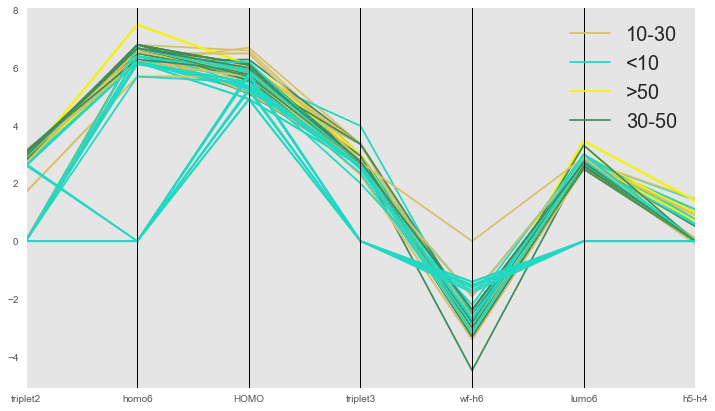

In [5]:
# energy and energy difference
df1 = df[[ 'triplet2', 'homo6', 'HOMO', 'triplet3', 'wf-h6', 'lumo6','h5-h4']] 
label = df['label']
df1['label'] = label

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20}
plt.rcParams.update(params)
parallel_coordinates(df1, 'label')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


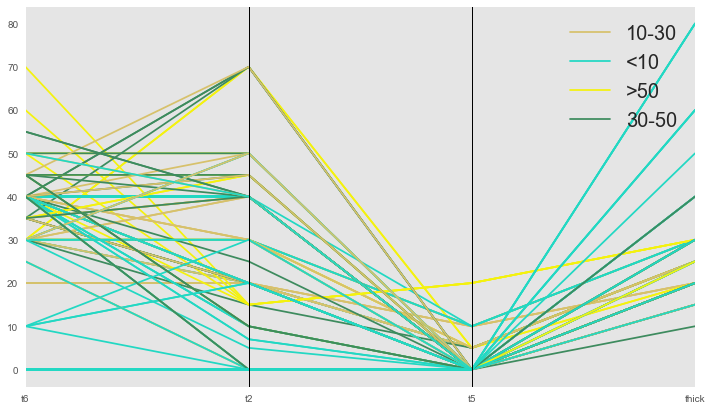

In [6]:
# thickness
df2 = df[[ 't6', 't2', 't5', 'thick']] 
label = df['label']
df2['label'] = label

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20}
plt.rcParams.update(params)
parallel_coordinates(df2, 'label')
plt.show()